# Identifying Pneumonina using Convolutional Neural Networks

- Student Name: Kevin Spring
- Student pace: Flex
- Scheduled Project Review: December 12, 2022
- Instructor name: Morgan Jones
- Blog Post

# Summary


# Table of Contents

# Introduction

# Methodology

## Data

In [ ]:
# Download the data.zip file and unpack it into test-train split using python_splitter
import os
from python_splitter import split_from_folder # https://github.com/bharatadk/python_splitter

# absolute path of unzipped data directory
PATH = os.path.join(os.path.abspath(os.getcwd()),'data\\')
split_from_folder(PATH, train = 0.8, test=0.2)
#pneumonia_path

In [1]:
import tensorflow as tf

sess = tf.Session()

ModuleNotFoundError: No module named 'tensorflow'

In [1]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

D:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\dty

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14039009617357312798
]


In [2]:
#import tensorflow as tf
#print(tf.__version__)
#print(tf.config.list_physical_devices())
#import keras
#print(keras.__version__)

1.14.0


AttributeError: module 'tensorflow._api.v1.config' has no attribute 'list_physical_devices'

In [3]:
import os, shutil

data_path = os.path.join(os.path.abspath(os.getcwd()),'Train_Test_Folder\\')
#data_path = os.path.join(os.path.abspath(os.getcwd()),'archive\\chest_xray')
print(data_path)

train_dir = os.path.join(data_path, 'train\\')
test_dir = os.path.join(data_path, 'test\\')
#val_dir = os.path.join(data_path, 'val\\')

train_normal = os.path.join(train_dir, 'NORMAL\\')
train_pneumonia = os.path.join(train_dir, 'PNEUMONIA\\')

D:\Documents\GitHub\flatiron-data-science\phase04\project\Pneumonia-detection-using-CNN\Train_Test_Folder\


In [4]:
# Show a representative image
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

print(f'Image number: {len(os.listdir(train_normal))}')
rand_norm = np.random.randint(0, len(os.listdir(train_normal)))
norm_img = os.listdir(train_normal)[rand_norm]
print('normal picture title: ', norm_img)
norm_img_address = train_normal+norm_img

#Pneumonia
rand_p = np.random.randint(0,len(os.listdir(train_pneumonia)))

pneu_img =  os.listdir(train_pneumonia)[rand_norm]
pneu_img_address = train_pneumonia+pneu_img
print('pneumonia picture title:', pneu_img)

# Load the image
norm_load = Image.open(norm_img_address)
pneu_load = Image.open(pneu_img_address)

# Show the picture
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(1,2,1)
img_plot = plt.imshow(norm_load, cmap='gray')
ax1.set_title('Normal')

ax2 = fig.add_subplot(1, 2, 2)
img_plot = plt.imshow(pneu_load, cmap='gray')
ax2.set_title('Pneumonia')

ModuleNotFoundError: No module named 'PIL'

In [7]:
# is the normal and pneumonia data evently split?


In [5]:
# Import data into tensorflow Dataset object
from tensorflow.keras.utils import image_dataset_from_directory
import tensorflow as tf

ImportError: cannot import name 'image_dataset_from_directory' from 'tensorflow.keras.utils' (unknown location)

In [9]:
img_height = 64
img_width = 64
rgb = 3
grayscale = 1
batch_size = 32

train_ds = image_dataset_from_directory(train_dir,
                                        color_mode='grayscale',
                                        label_mode='binary',
                                        validation_split=0.2,
                                        subset='training',
                                        seed=42,
                                        #shuffle=False,
                                        image_size=(img_height, img_width),
                                        batch_size = batch_size)

#A possible issue is that Keras validation_split uses the "last x percent" 
# of data as validation data without shuffling the data. 
# So if your data has a certain stratification, this stratification will 
# affect the validation set.
val_ds = image_dataset_from_directory(train_dir,
                                      validation_split=0.2,
                                      color_mode='grayscale',
                                      label_mode='binary',
                                      subset="validation",
                                      seed=42,
                                      #shuffle=False,
                                      image_size=(img_height, img_width),
                                      batch_size=batch_size)

test_ds = image_dataset_from_directory(test_dir,
                                       shuffle=False,
                                       color_mode='grayscale',
                                       label_mode='binary',
                                       image_size=(img_height, img_width)
                                      )

print('Batches for testing -->', test_ds.cardinality())
print('Batches for validating -->', val_ds.cardinality())
print('Batches for training -->', train_ds.cardinality())

Found 4684 files belonging to 2 classes.
Using 3748 files for training.
Found 4684 files belonging to 2 classes.
Using 936 files for validation.
Found 1172 files belonging to 2 classes.
Batches for testing --> tf.Tensor(37, shape=(), dtype=int64)
Batches for validating --> tf.Tensor(30, shape=(), dtype=int64)
Batches for training --> tf.Tensor(118, shape=(), dtype=int64)


In [10]:
print(train_ds.class_names)
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

['normal', 'pneumonia']
(32, 64, 64, 1)
(32, 1)


In [11]:
# Configure the dataset for performance
AUTOTUNE = tf.data.AUTOTUNE

# Dataset.cache keeps the images in memory after they're loaded off disk during the first epoch. 
# This will ensure the dataset does not become a bottleneck while training your model.
# Dataset.prefetch overlaps data preprocessing and model execution while training.
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [12]:
# libraries for neural networks
from tensorflow import keras
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Rescaling
from keras.metrics import SpecificityAtSensitivity

In [15]:
def plot_fun(model):
    acc = model.history['accuracy']
    val_acc = model.history['val_accuracy']

    loss = model.history['loss']
    val_loss = model.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, 'g-', label='Training Accuracy')
    plt.plot(epochs_range, val_acc, 'r-', label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, 'g-', label='Training Loss')
    plt.plot(epochs_range, val_loss, 'r-', label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

#plot_fun(baseline_cnn_fit)
# Visualize training results
#plot_fun(cnn_model)

In [13]:
#import tensorflow.keras import layers

# Baseline model
inputs = keras.Input(shape=(img_height, img_width, grayscale))
x = Conv2D(filters=32, kernel_size=3, activation='relu')(inputs)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = Flatten()(x)
outputs = Dense(1, activation='sigmoid')(x)
model_baseline = keras.Model(inputs=inputs, outputs=outputs)

# Compile the Neural network
model_baseline.compile(optimizer = 'adam', 
                        loss = 'binary_crossentropy',
                        metrics = ['accuracy', 
                                   keras.metrics.Recall(),
                                   keras.metrics.SpecificityAtSensitivity(0.5)])

# Summary
model_baseline.summary()

# Fit model
epochs=20
model_baseline_fit = model_baseline.fit(train_ds,
                                         epochs=epochs,
                                         validation_data = val_ds,
                                         batch_size=64)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856 

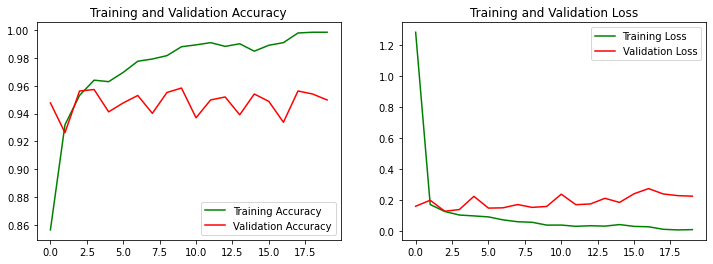

In [17]:
plot_fun(model_baseline_fit)

In [46]:
# CNN model
cnn = Sequential()

# Rescaling
cnn.add(Rescaling(1./255, input_shape=(img_height, img_width, grayscale)))

#Convolution
cnn.add(Conv2D(32, (3, 3), 
               padding='same',
               activation="relu", 
               input_shape=(img_height, img_width, grayscale)))

#Pooling
cnn.add(MaxPooling2D(pool_size = (2, 2)))

# 2nd Convolution
#cnn.add(Conv2D(32, (3, 3), activation="relu"))

# 2nd Pooling layer
#cnn.add(MaxPooling2D(pool_size = (2, 2)))

# Flatten the layer
cnn.add(Flatten())

# Fully Connected Layers
#cnn.add(Dense(activation = 'relu', units = 128))
cnn.add(Dense(activation = 'sigmoid', units = 1))

# Compile the Neural network
cnn.compile(optimizer = 'adam', 
            loss = 'binary_crossentropy',
            metrics = ['accuracy', 
                       keras.metrics.Precision(),
                       keras.metrics.Recall(),
                       keras.metrics.SpecificityAtSensitivity(0.5),
                       keras.metrics.SensitivityAtSpecificity(0.5)])

# Summary
cnn.summary()

# Fit model
epochs=20
cnn_model = cnn.fit(train_ds,
                    #steps_per_epoch = 163,
                    epochs=epochs,
                    validation_data = val_ds)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_8 (Rescaling)     (None, 64, 64, 1)         0         
                                                                 
 conv2d_14 (Conv2D)          (None, 64, 64, 32)        320       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 32768)             0         
                                                                 
 dense_13 (Dense)            (None, 1)                 32769     
                                                                 
Total params: 33,089
Trainable params: 33,089
Non-trainable params: 0
__________________________________________________

Epoch 19/20
118/118 [==============================] - 2s 13ms/step - loss: 0.0795 - accuracy: 0.9728 - precision_8: 0.9785 - recall_8: 0.9842 - specificity_at_sensitivity_8: 0.9990 - sensitivity_at_specificity_8: 0.9996 - val_loss: 0.1305 - val_accuracy: 0.9562 - val_precision_8: 0.9656 - val_recall_8: 0.9754 - val_specificity_at_sensitivity_8: 1.0000 - val_sensitivity_at_specificity_8: 1.0000
Epoch 20/20
118/118 [==============================] - 2s 13ms/step - loss: 0.0681 - accuracy: 0.9771 - precision_8: 0.9825 - recall_8: 0.9861 - specificity_at_sensitivity_8: 0.9990 - sensitivity_at_specificity_8: 1.0000 - val_loss: 0.1382 - val_accuracy: 0.9455 - val_precision_8: 0.9705 - val_recall_8: 0.9551 - val_specificity_at_sensitivity_8: 1.0000 - val_sensitivity_at_specificity_8: 1.0000


In [ ]:
# Discussion 5 epochs

In [23]:
# baseline model
baseline_cnn = Sequential()

# Rescaling
baseline_cnn.add(Rescaling(1./255, input_shape=(img_height, img_width, grayscale)))

#Convolution
baseline_cnn.add(Conv2D(32, (3, 3),
                        padding='same',
                        activation="relu", 
                        input_shape=(img_height, img_width, grayscale)))

#Pooling
baseline_cnn.add(MaxPooling2D(pool_size = (2, 2)))

# Flatten
baseline_cnn.add(Flatten())

baseline_cnn.add(Dense(activation = 'relu', units = 128))

# Output Layer
baseline_cnn.add(Dense(units=1, name='sigmoid'))

# Compile the Neural network
baseline_cnn.compile(optimizer = 'adam', 
                     loss = 'binary_crossentropy',
                     metrics = ['accuracy', 
                                keras.metrics.Precision(),
                                keras.metrics.Recall(),
                                keras.metrics.SpecificityAtSensitivity(0.5),
                                keras.metrics.SensitivityAtSpecificity(0.5)])

# Summary
baseline_cnn.summary()

# Fit
epochs = 20
baseline_cnn_fit = baseline_cnn.fit(train_ds,
                                   #steps_per_epoch = 163,
                                   epochs=epochs,
                                   validation_data = val_ds,
                                   #validation_steps= testing_set.samples
                                   )

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 64, 64, 1)         0         
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 32)        320       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 32768)             0         
                                                                 
 dense_5 (Dense)             (None, 128)               4194432   
                                                                 
 sigmoid (Dense)             (None, 1)                 129       
                                                      

InvalidArgumentError: Graph execution error:

Detected at node 'assert_greater_equal/Assert/AssertGuard/Assert' defined at (most recent call last):
    File "D:\ProgramData\Anaconda3\envs\tf\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "D:\ProgramData\Anaconda3\envs\tf\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "D:\ProgramData\Anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "D:\ProgramData\Anaconda3\envs\tf\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "D:\ProgramData\Anaconda3\envs\tf\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
      self.io_loop.start()
    File "D:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "D:\ProgramData\Anaconda3\envs\tf\lib\asyncio\base_events.py", line 600, in run_forever
      self._run_once()
    File "D:\ProgramData\Anaconda3\envs\tf\lib\asyncio\base_events.py", line 1896, in _run_once
      handle._run()
    File "D:\ProgramData\Anaconda3\envs\tf\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "D:\ProgramData\Anaconda3\envs\tf\lib\site-packages\ipykernel\kernelbase.py", line 471, in dispatch_queue
      await self.process_one()
    File "D:\ProgramData\Anaconda3\envs\tf\lib\site-packages\ipykernel\kernelbase.py", line 460, in process_one
      await dispatch(*args)
    File "D:\ProgramData\Anaconda3\envs\tf\lib\site-packages\ipykernel\kernelbase.py", line 367, in dispatch_shell
      await result
    File "D:\ProgramData\Anaconda3\envs\tf\lib\site-packages\ipykernel\kernelbase.py", line 662, in execute_request
      reply_content = await reply_content
    File "D:\ProgramData\Anaconda3\envs\tf\lib\site-packages\ipykernel\ipkernel.py", line 360, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "D:\ProgramData\Anaconda3\envs\tf\lib\site-packages\ipykernel\zmqshell.py", line 532, in run_cell
      return super().run_cell(*args, **kwargs)
    File "D:\ProgramData\Anaconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 2880, in run_cell
      result = self._run_cell(
    File "D:\ProgramData\Anaconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 2935, in _run_cell
      return runner(coro)
    File "D:\ProgramData\Anaconda3\envs\tf\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "D:\ProgramData\Anaconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 3134, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "D:\ProgramData\Anaconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 3337, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "D:\ProgramData\Anaconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 3397, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\kevin\AppData\Local\Temp\ipykernel_13064\3856174219.py", line 38, in <cell line: 38>
      baseline_cnn_fit = baseline_cnn.fit(train_ds,
    File "D:\ProgramData\Anaconda3\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "D:\ProgramData\Anaconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 1409, in fit
      tmp_logs = self.train_function(iterator)
    File "D:\ProgramData\Anaconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 1051, in train_function
      return step_function(self, iterator)
    File "D:\ProgramData\Anaconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 1040, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "D:\ProgramData\Anaconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 1030, in run_step
      outputs = model.train_step(data)
    File "D:\ProgramData\Anaconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 894, in train_step
      return self.compute_metrics(x, y, y_pred, sample_weight)
    File "D:\ProgramData\Anaconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 987, in compute_metrics
      self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "D:\ProgramData\Anaconda3\envs\tf\lib\site-packages\keras\engine\compile_utils.py", line 501, in update_state
      metric_obj.update_state(y_t, y_p, sample_weight=mask)
    File "D:\ProgramData\Anaconda3\envs\tf\lib\site-packages\keras\utils\metrics_utils.py", line 70, in decorated
      update_op = update_state_fn(*args, **kwargs)
    File "D:\ProgramData\Anaconda3\envs\tf\lib\site-packages\keras\metrics\base_metric.py", line 140, in update_state_fn
      return ag_update_state(*args, **kwargs)
    File "D:\ProgramData\Anaconda3\envs\tf\lib\site-packages\keras\metrics\metrics.py", line 818, in update_state
      return metrics_utils.update_confusion_matrix_variables(
    File "D:\ProgramData\Anaconda3\envs\tf\lib\site-packages\keras\utils\metrics_utils.py", line 602, in update_confusion_matrix_variables
      tf.debugging.assert_greater_equal(
Node: 'assert_greater_equal/Assert/AssertGuard/Assert'
assertion failed: [predictions must be >= 0] [Condition x >= y did not hold element-wise:] [x (sequential_3/sigmoid/BiasAdd:0) = ] [[-0.155957013][-0.128160834][-0.132769421]...] [y (Cast_6/x:0) = ] [0]
	 [[{{node assert_greater_equal/Assert/AssertGuard/Assert}}]] [Op:__inference_train_function_33911]

In [ ]:
# Data augmentation
from keras.layers import RandomFlip
from keras.layers import RandomRotation
from keras.layers import RandomZoom

rescale = Sequential([Rescaling(1./255)])

data_augmentation = keras.Sequential([
                                RandomFlip("horizontal",
                                        input_shape=(img_height, img_width, 1)),
                                RandomRotation(0.1),
                                RandomZoom(0.1)
                    ])

# Visualize a few augmented examples by applying data augmentation to the same image several times:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"),cmap='gray')
    plt.axis("off")

In [ ]:
model_aug = Sequential([rescale,
                        data_augmentation,
                        Conv2D(32, (3,3), 
                               padding='same', 
                               activation='relu', 
                               input_shape=(img_height, img_width, 1)),
                        MaxPooling2D(pool_size=(2,2)),
                        Conv2D(32, (3,3), 
                               padding='same', 
                               activation='relu'),
                        MaxPooling2D(pool_size=(2,2)),
                        Flatten(),
                        Dense(128, activation='relu'),
                        Dense(units=1, name="sigmoid")
                        ])
# Compile the Neural network
model_aug.compile(optimizer = 'adam', 
                   loss = 'binary_crossentropy',
                   metrics = ['accuracy', 
                              keras.metrics.Precision(),
                              keras.metrics.Recall(),
                              keras.metrics.SpecificityAtSensitivity(0.5),
                              keras.metrics.SensitivityAtSpecificity(0.5)])

# Summary
#model_aug.summary()

# Fit model
#epochs=20
#cnn_aug_model = model_augmentation.fit(train_ds,
                                       #steps_per_epoch = 163,
#                                       epochs=epochs,
#                                       validation_data = val_ds,
                                       #validation_steps= testing_set.samples
#                                       )

In [ ]:
model_aug.summary()

In [ ]:
# Model with transfer learning
from keras.applications import VGG19

cnn_vgg19 = VGG19(weights='imagenet',
                 include_top=False,
                 input_shape=(img_height, img_width, rgb))

cnn_vgg19.summary()

In [ ]:
model_transfer = Sequential([
                          data_augmentation,
                          Rescaling(1./255, input_shape=(img_height, img_width,1)),
                          Conv2D(32, (3,3), 
                                 padding='same', 
                                 activation='relu', 
                                 input_shape=(img_height, img_width, 1)),
                          MaxPooling2D(pool_size=(2,2)),
                          Conv2D(32, (3,3), padding='same', activation='relu'),
                          MaxPooling2D(pool_size=(2,2)),
                          Dropout(0.2),
                          Flatten(),
                          Dense(128, activation='relu'),
                          Dense(units=1, name="sigmoid")